In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.signal import welch

%matplotlib inline

# Probe Processing @ (1.0, 0.5, 0.5) #
### Data acquisition and organization ###

[(0, 'ux'), (0, 'uy'), (0, 'uz')]


In [14]:
# Choose data set to process
fine_resolution = False
fname = ''
if fine_resolution:
    fname = './postProcessing/center_probe/290.5/U'
else:
    fname = './postProcessing_60/center_probe/50/U'

# Read data to DataFrame
u = pd.read_csv(fname,
                delim_whitespace=True,
                comment='#',
                header=None,
                index_col=0)

# Create ux, uy, and uz MultiIndex columns for each probe point
num_pts = int(u.shape[1]/3)
mi_labels = []
for pt in range(num_pts):
    for comp in ["ux", "uy", "uz"]:
        mi_labels.append(tuple([pt, comp]))
cols = pd.MultiIndex.from_tuples(mi_labels)
# Apply MultiIndex columns to DataFrame
u.columns = cols
# Modify DataFrame column names
u.index.name = 'Time'
u.columns.names = ['Probes','Component']

# Create full turbulence variable and fluctuating part variable
ueff = u
up = ueff-ueff.mean()

# Gather data from file header
uheader = pd.read_csv(fname,
                      delim_whitespace=True,
                      nrows=int(u.shape[1]/3),
                      names=[0,1,2,'x','y','z'],
                      usecols=[2,'x','y','z'],
                      index_col=0)
uheader.index.name=u.columns.names[0]

### Data processing ###

In [19]:
data = up[0]["ux"][-800:]
print(data)


Time
50.0003   -0.498469
50.0005   -0.475869
50.0008   -0.450569
50.0010   -0.423469
50.0013   -0.394569
50.0015   -0.363269
50.0018   -0.329569
50.0020   -0.293269
50.0023   -0.254469
50.0025   -0.212969
50.0028   -0.168969
50.0030   -0.122469
50.0033   -0.073369
50.0035   -0.021969
50.0038    0.031531
50.0040    0.086731
50.0043    0.143331
50.0045    0.201131
50.0048    0.259531
50.0050    0.318231
50.0053    0.376531
50.0055    0.434131
50.0058    0.490431
50.0060    0.544731
50.0063    0.596331
50.0065    0.644731
50.0068    0.689531
50.0070    0.729931
50.0073    0.765531
50.0075    0.795731
             ...   
58.0028    0.415231
58.0030    0.401931
58.0033    0.389131
58.0035    0.376931
58.0038    0.365431
58.0040    0.354631
58.0043    0.344531
58.0045    0.335131
58.0048    0.326431
58.0050    0.318531
58.0053    0.311331
58.0055    0.304631
58.0058    0.298431
58.0060    0.292731
58.0063    0.287531
58.0065    0.282731
58.0068    0.278231
58.0070    0.273931
58.0073    0.26

### Plotting and baseline curves ###

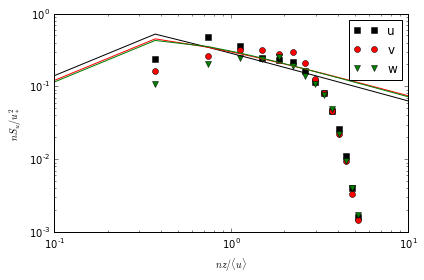

In [21]:
f = ndSu.index.values
# Baseline curves
ndSu['Kaimal u'] = 200.*f/(1+50.*f)**(5./3.)
ndSu['Kaimal v'] = 15.*f/(1+9.5*f)**(5./3.)
ndSu['Kaimal w'] = 3.36*f/(1+10.*f**(5./3.))
# Plot configuration
styles = ['ks','ro','gv','k','r','g']
ax = ndSu.plot(loglog=True,style=styles)
ax.set_xlabel('$nz/\\langle u\\rangle$')
ax.set_ylabel('$nS_u/u_*^2$')
ax.legend(['u','v','w'], loc='best')
# Set axis limits
ax.set_xlim(0.1,10)
ax.set_ylim(0.001, 1)
fig=plt.gcf()
fig.tight_layout()
if fine_resolution:
    fig.savefig('fine_spectrum.png')
else:
    fig.savefig('coarse_spectrum.png')
    
plt.show()

In [24]:
#DEBUG
print("uheader.z[0] = {}".format(uheader.z[0]))
print("u mean = {}".format(u[0, 'ux'].mean()))
print("fine resolution? {}".format(fine_resolution))

uheader.z[0] = 0.5
u mean = 10.514869104556803
fine resolution? False
